## Tom Göring - 58535, Ali Hamzeh – 58136, Benjamin Schmidt - 59599, Priyanshu Yadav - 59061

In [74]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from catboost import CatBoostClassifier, Pool, cv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

In [75]:
#Please use this path to run after unpacking: 'Customer-Churn-Records.csv'
df_churn = pd.read_csv('/mnt/c/Users/tomgo/Documents/NOVA/S2/Machine_Learning/Group_Project/Customer-Churn-Records.csv')
df_churn.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0,0,1,GOLD,231
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0,0,5,DIAMOND,488
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0,0,2,GOLD,965
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0,0,4,SILVER,289


## Data Insight

In [76]:
df_churn.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

There is no duplicated Customer Id which means all the rows are refered to an unique customer.

In [77]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [78]:
df_churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

There is no any null values.

In [79]:
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


The range for all attributes are okay except Estimated salary.

In [80]:
(df_churn['EstimatedSalary'] < 15080).sum()

754

754 Costumers have the estimated salary below the expected minimum wage.

In [81]:
df_churn["Exited"].mean()


0.2038

In [82]:
df_churn[df_churn["Exited"] == 1].shape[0] / df_churn[df_churn["Exited"] == 0].shape[0]


0.2559658377292138

we plot some charts for categorical values to find out some insights about churners.


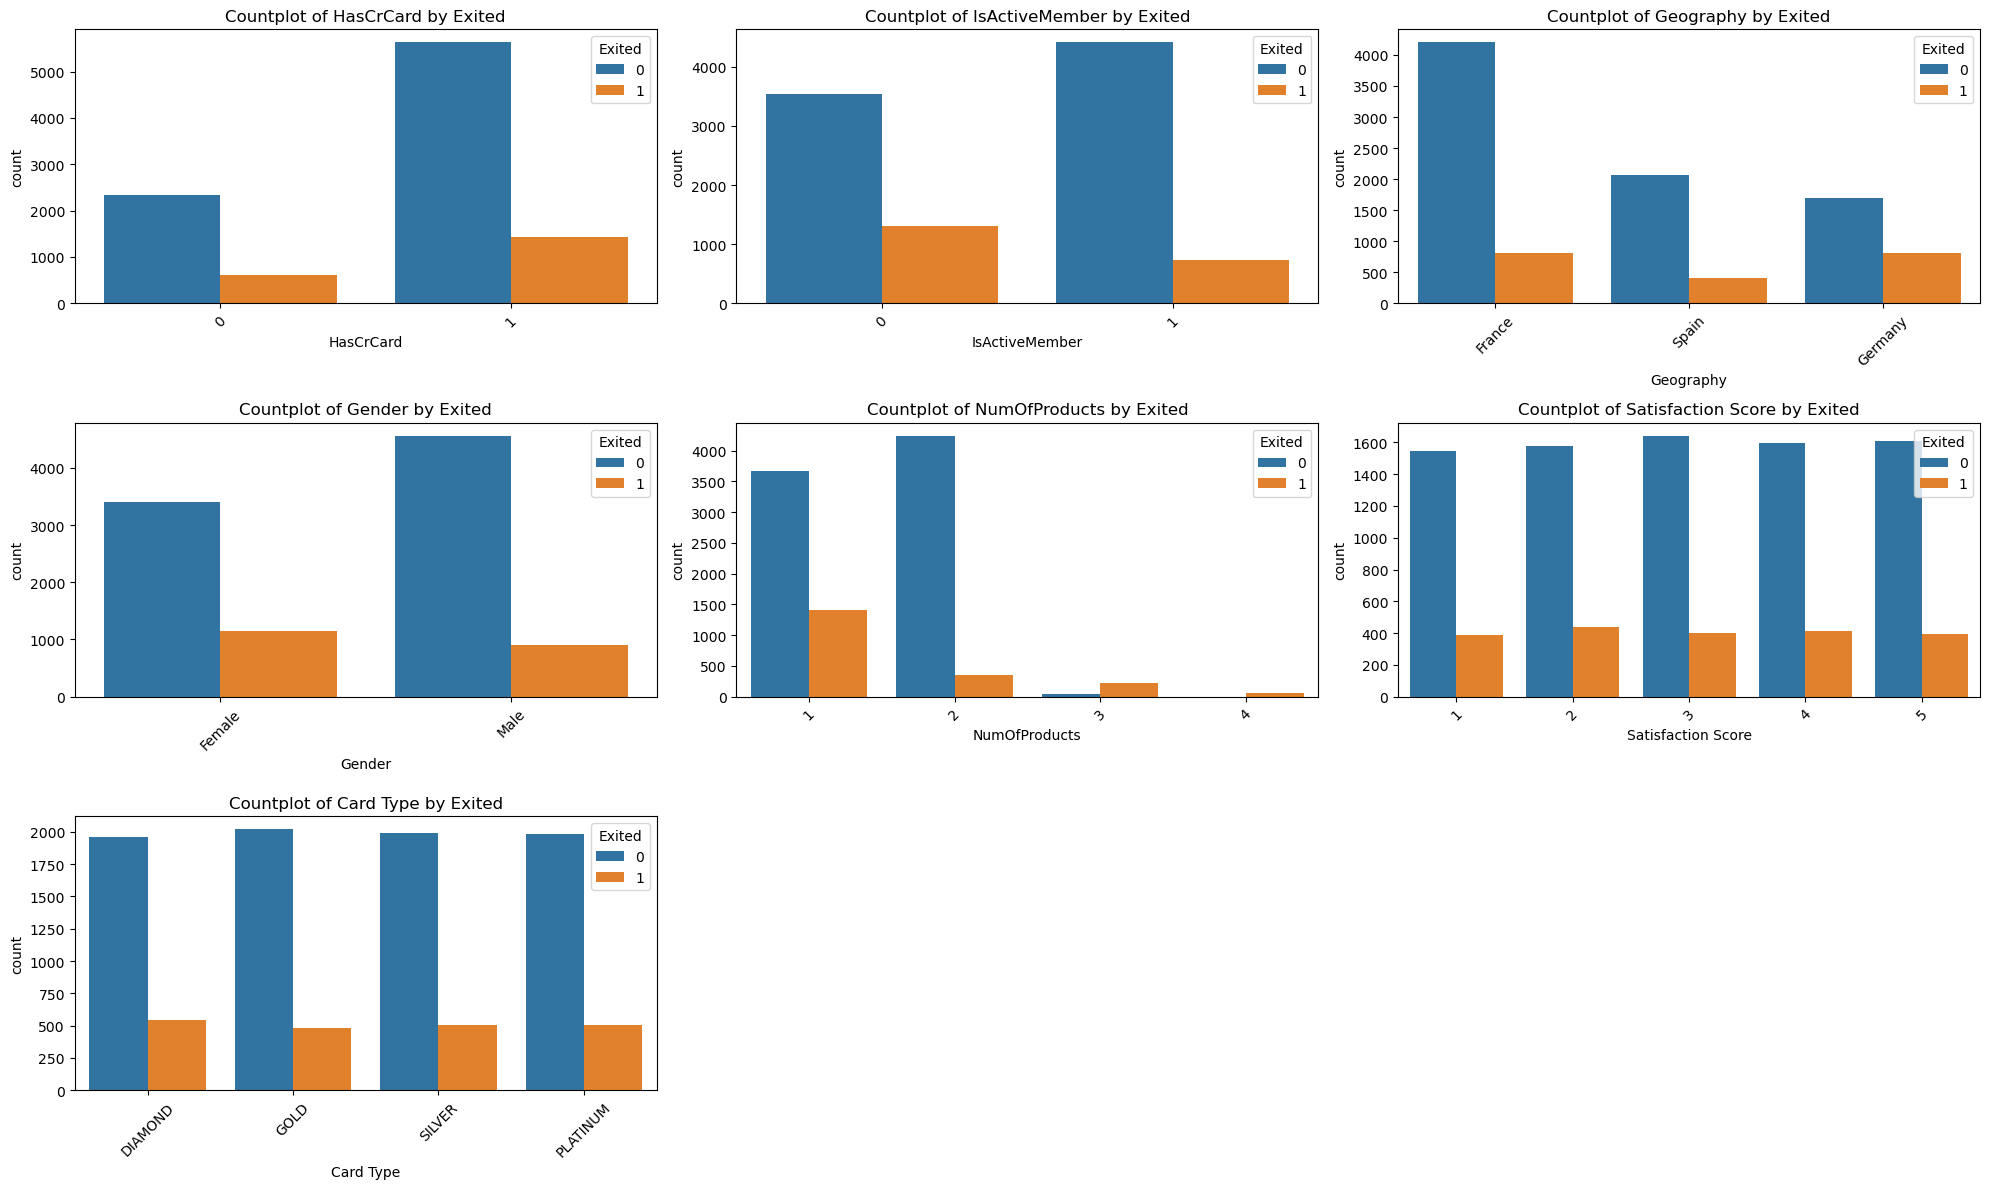

In [83]:
# Setting up the figure size for better readability
plt.figure(figsize=(20, 12))

# Creating subplots for each variable
variables = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'NumOfProducts', 'Satisfaction Score', 'Card Type']
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_churn, x=var, hue='Exited')
    plt.title(f'Countplot of {var} by Exited')
    plt.xticks(rotation=45)

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In the following step we find out the outliers.

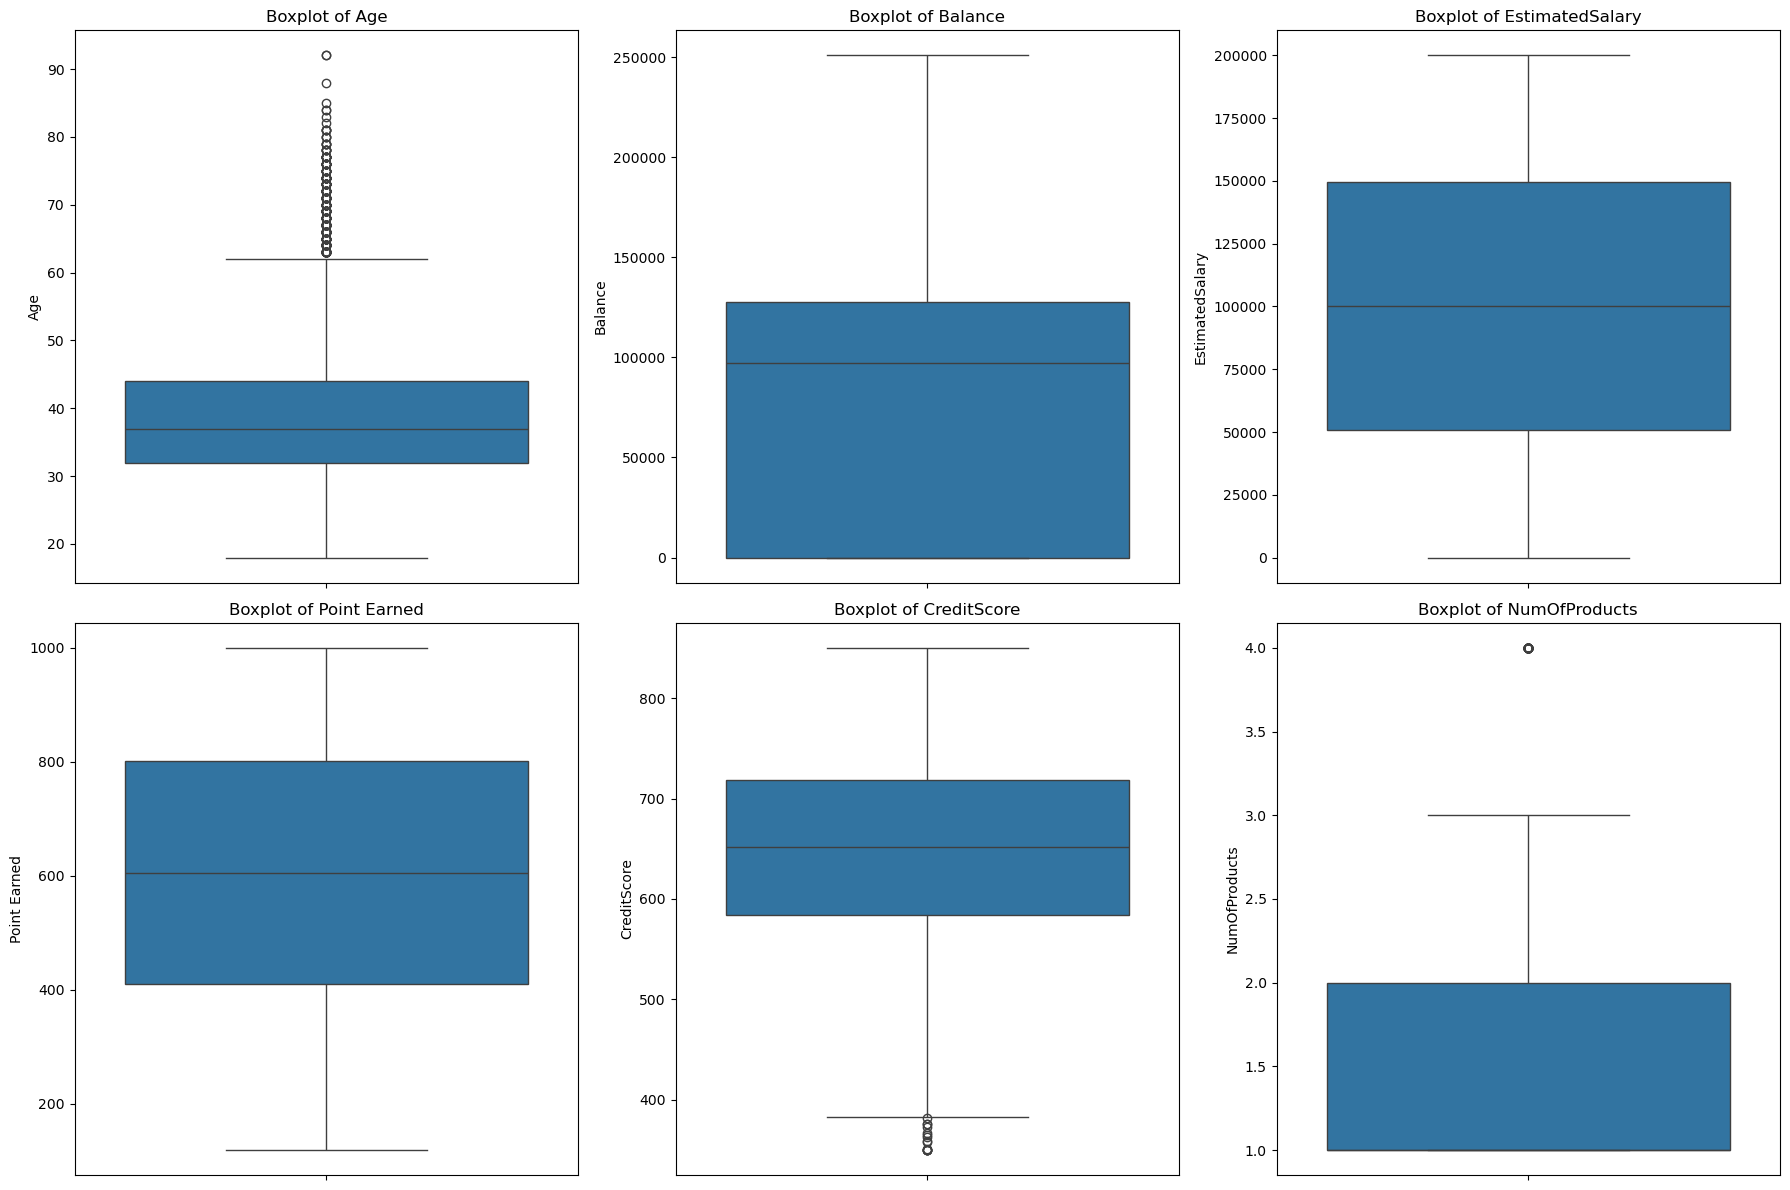

In [84]:
# Setting up the figure size for better readability
plt.figure(figsize=(18, 12))

# List of variables to check for outliers, including 'NumberOfProducts'
variables = ['Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'NumOfProducts']

# Creating boxplots for each variable with hue set to 'Exited' to observe differences between churners and non-churners
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_churn, y=var)
    plt.title(f'Boxplot of {var}')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

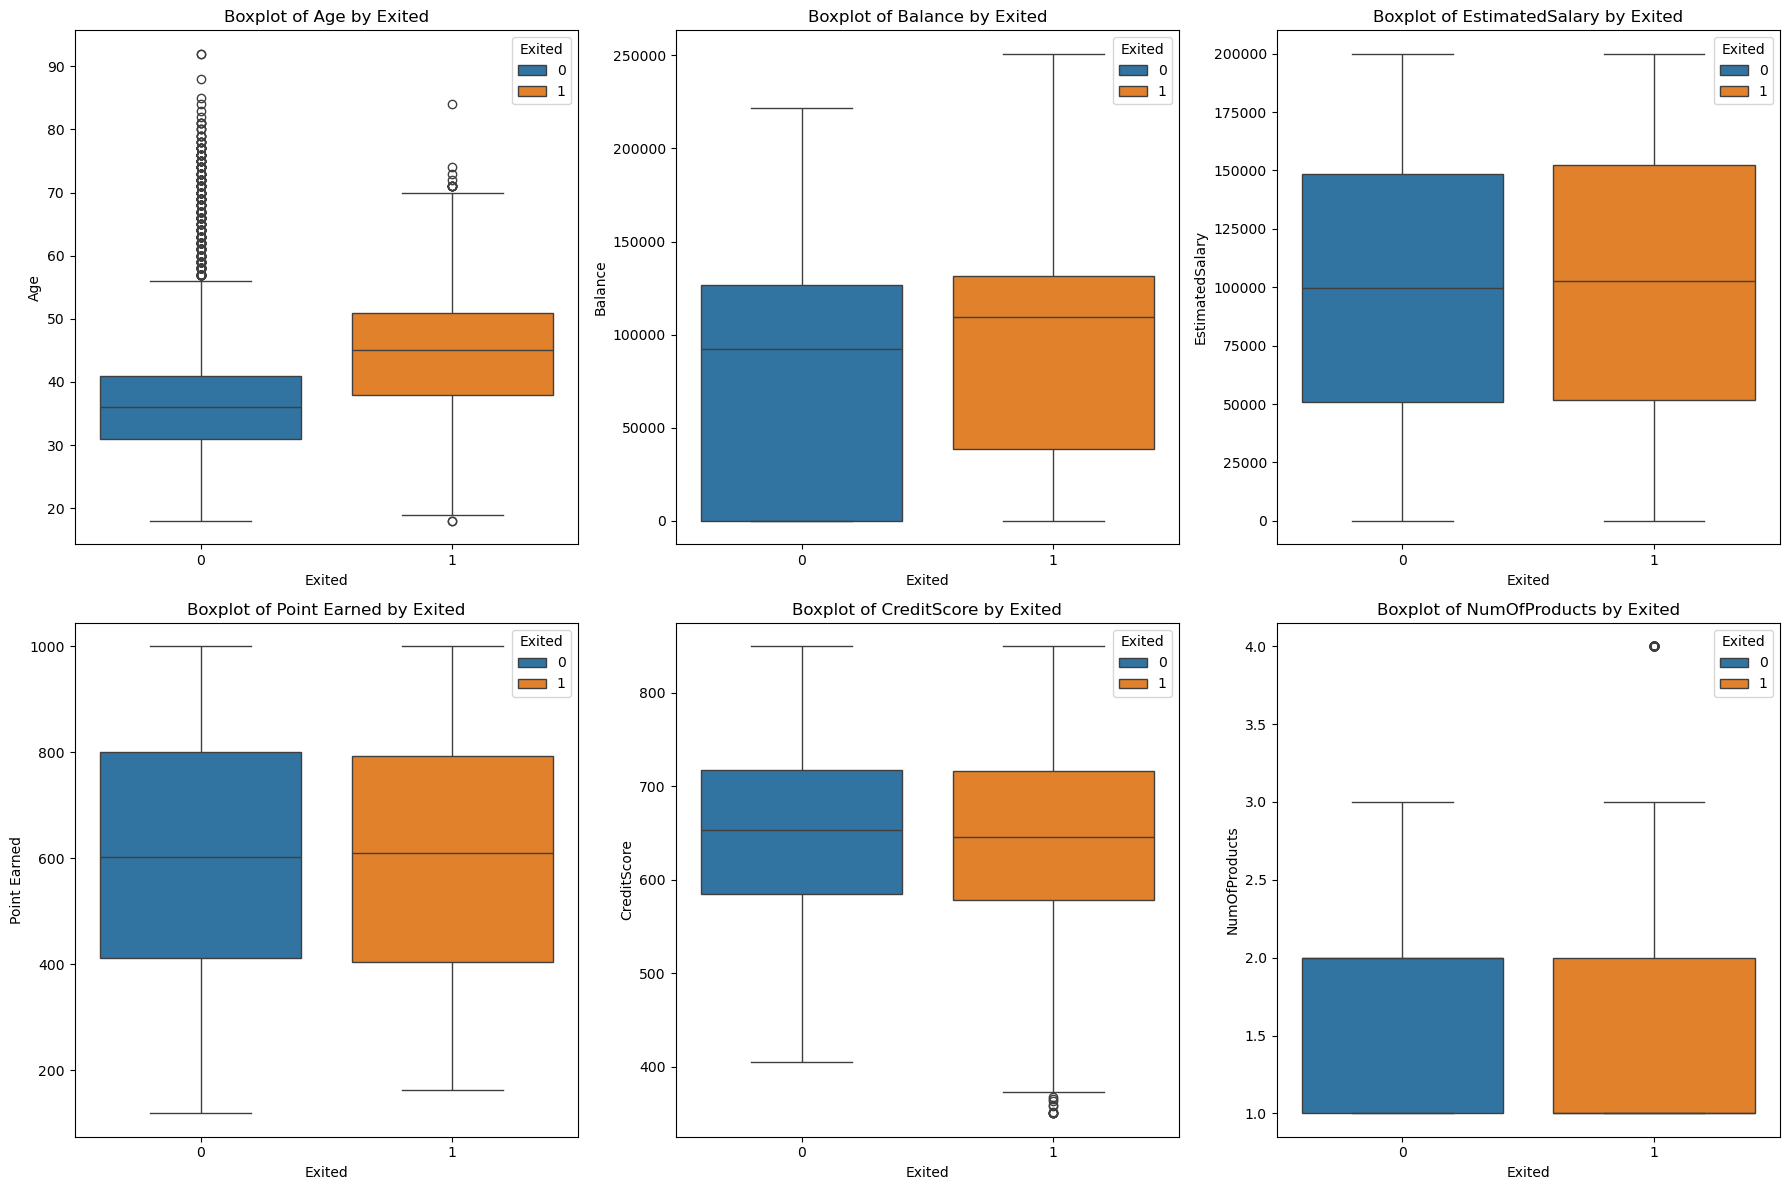

In [85]:
# Setting up the figure size for better readability
plt.figure(figsize=(18, 12))

# List of variables to check for outliers, including 'NumberOfProducts'
variables = ['Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'NumOfProducts']

# Creating boxplots for each variable with hue set to 'Exited' to observe differences between churners and non-churners
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_churn, y=var, x='Exited', hue='Exited')
    plt.title(f'Boxplot of {var} by Exited')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

## Featrue Engineering

Firstly, we'll remove the "RowNumber", "CustomerId", and "CustomerSurname" columns from the dataset as they do not contribute to calibrating our models.

In [86]:
# drop costumer surename, the row number and costumerid
df_churn.drop('RowNumber', axis = 1, inplace = True)
df_churn.drop('Surname', axis = 1, inplace = True)
df_churn.drop('CustomerId', axis = 1, inplace = True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Create dummy values for geography.

In [87]:
df_churn = pd.get_dummies(df_churn, columns=['Geography'])
df_churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0,0,1


Female = 0, Male = 1

In [88]:
df_churn['Gender'] = df_churn['Gender'].map({'Female': 0, 'Male': 1})
df_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,0,1,0


Prepare the card type value.

In [89]:
df_churn['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [90]:
# give silver 1, gold 2, diamond 3 and platinum 4
df_churn['Card Type'] = df_churn['Card Type'].map({'DIAMOND':3, 'GOLD':2, 'SILVER':1, 'PLATINUM':4})
df_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,3,464,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,2,350,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,3,300,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,4,771,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,1,564,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339,0,1,0


Remove outliers.

In [91]:
# Calculate the IQR for Age, CreditScore, and NumOfProducts to identify outliers
Q1 = df_churn[['Age', 'CreditScore', 'NumOfProducts']].quantile(0.25)
Q3 = df_churn[['Age', 'CreditScore', 'NumOfProducts']].quantile(0.75)
IQR = Q3 - Q1

# Define the criteria for being an outlier
outlier_criteria = ((df_churn < (Q1 - 1.5 * IQR)) | (df_churn > (Q3 + 1.5 * IQR)))

# Apply the criteria to filter out the outliers
df_churn = df_churn[~((df_churn[['Age', 'CreditScore', 'NumOfProducts']] < (Q1 - 1.5 * IQR)) |(df_churn[['Age', 'CreditScore', 'NumOfProducts']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_churn

/tmp/ipykernel_1039/3842931700.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_criteria = ((df_churn < (Q1 - 1.5 * IQR)) | (df_churn > (Q3 + 1.5 * IQR)))


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,3,464,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,2,350,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,3,300,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,4,771,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,1,564,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339,0,1,0


411 outliers reomved from dataset.

In [92]:
df_churn['SalaryUnormal'] = (df_churn['EstimatedSalary'] < 15080).astype(int)
df_churn

/tmp/ipykernel_1039/2867544512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['SalaryUnormal'] = (df_churn['EstimatedSalary'] < 15080).astype(int)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,SalaryUnormal
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,3,464,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,2,350,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,3,300,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,4,771,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,1,564,1,0,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339,0,1,0,0


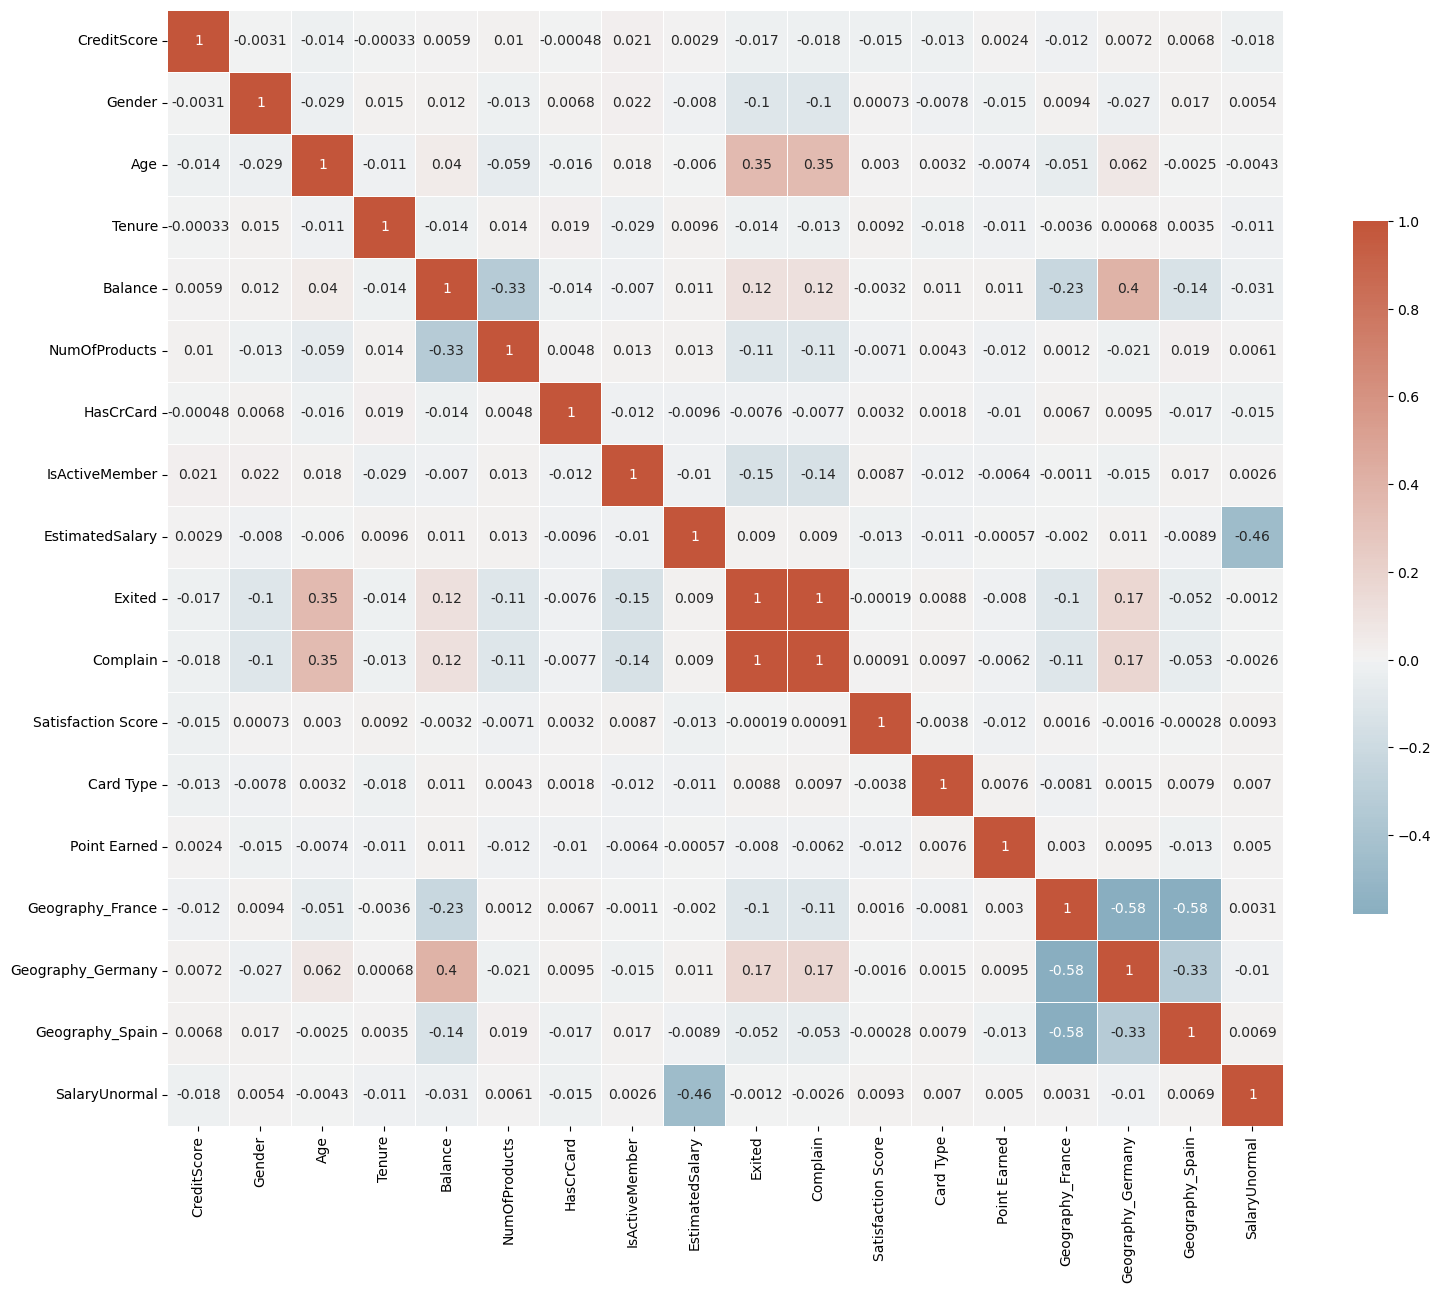

In [93]:
# Compute the correlation matrix
corr = df_churn.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the correct aspect ratio and numbers in each cell
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


drop complain

In [94]:
df_churn.drop('Complain', axis=1, inplace=True)
df_churn

/tmp/ipykernel_1039/2885856573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn.drop('Complain', axis=1, inplace=True)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,SalaryUnormal
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,3,464,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,3,3,456,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3,3,377,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,5,2,350,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,5,2,425,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,3,300,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,5,4,771,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,3,1,564,1,0,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,2,2,339,0,1,0,0


normalizing all values.

In [95]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Select columns to be normalized (excluding non-numeric or binary columns)
columns_to_normalize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 
                        'Satisfaction Score', 'Card Type', 'Point Earned']

# Apply RobustScaler to the selected columns
df_churn[columns_to_normalize] = scaler.fit_transform(df_churn[columns_to_normalize])

df_churn

/tmp/ipykernel_1039/1636481852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn[columns_to_normalize] = scaler.fit_transform(df_churn[columns_to_normalize])


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,SalaryUnormal
0,-0.248120,0,0.454545,-0.75,-0.760823,0.0,1,1,0.012388,1,-0.5,0.0,-0.357326,1,0,0,0
1,-0.330827,0,0.363636,-1.00,-0.104080,0.0,0,1,0.126091,0,0.0,0.0,-0.377892,0,0,1,0
2,-1.127820,0,0.454545,0.75,0.490326,2.0,1,0,0.140200,1,0.0,0.0,-0.580977,1,0,0,0
3,0.353383,0,0.181818,-1.00,-0.760823,1.0,0,0,-0.064021,0,1.0,-0.5,-0.650386,1,0,0,0
4,1.488722,0,0.545455,-0.75,0.222717,0.0,1,1,-0.213772,0,1.0,-0.5,-0.457584,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.894737,1,0.181818,0.00,-0.760823,1.0,1,0,-0.039196,0,-1.0,0.0,-0.778920,1,0,0,0
9996,-1.022556,1,-0.181818,1.25,-0.311258,0.0,1,1,0.015952,0,1.0,0.5,0.431877,1,0,0,0
9997,0.428571,0,-0.090909,0.50,-0.760823,0.0,0,1,-0.589594,1,0.0,-1.0,-0.100257,1,0,0,0
9998,0.902256,1,0.454545,-0.50,-0.172511,1.0,1,0,-0.073550,1,-0.5,-0.5,-0.678663,0,1,0,0


Looking at the class balance:

In [96]:
percentage_of_churners = (df_churn["Exited"].mean() * 100).round(2)
print(f'the percentage of churnders is {percentage_of_churners}')

the percentage of churnders is 19.77


Takeaway: Imbalanced classes. this is important for the modelling.

In [97]:
# Prepare the data
X = df_churn.drop('Exited', axis=1)
y = df_churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

## Models

In [98]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# RFE with Cross-Validation
rfecv = RFECV(estimator=logistic_model, step=1, cv=5, scoring='f1_weighted')

# Create a pipeline that first selects features with RFECV and then trains a logistic model
pipeline = Pipeline(steps=[('feature_selection', rfecv),
                           ('logistic', logistic_model)])


# Grid Search
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(X_train, y_train)

# Best model after grid search
best_model_logistic = grid_search.best_estimator_

# Make predictions
y_pred_logistic = best_model_logistic.predict(X_test)
y_pred_proba_logistic = best_model_logistic.predict_proba(X_test)[:, 1]
Y_pred_proba_logistic = best_model_logistic.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
print("Best model parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_logistic)
print("AUC:", auc_logistic)
print("Confusion Matrix:\n", cm_logistic)
print("Classification Report:\n", report_logistic)


# Printing Features
logistic_model = best_model_logistic.named_steps['logistic']
rfecv_fitted = best_model_logistic.named_steps['feature_selection']
selected_features_indices = rfecv_fitted.get_support(indices=True)
selected_feature_names = [X_train.columns[index] for index in selected_features_indices]
coefficients = logistic_model.coef_[0]
feature_importance_pairs = zip(selected_feature_names, coefficients)
sorted_features = sorted(feature_importance_pairs, key=lambda x: abs(x[1]), reverse=True)

print("Features sorted by importance (coefficient magnitude):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

most_important_feature = sorted_features[0][0]
print(f"The most important feature is: {most_important_feature}")


Best model parameters: {'logistic__C': 100}
Accuracy: 0.8234064785788924
AUC: 0.8003502979883893
Confusion Matrix:
 [[1464   59]
 [ 279  112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1523
           1       0.65      0.29      0.40       391

    accuracy                           0.82      1914
   macro avg       0.75      0.62      0.65      1914
weighted avg       0.80      0.82      0.79      1914

Features sorted by importance (coefficient magnitude):
Age: 1.1736695119664238
IsActiveMember: -0.8374167259629942
Geography_France: -0.5447144700178854
Gender: -0.493679047533777
Geography_Spain: -0.49245380903800123
NumOfProducts: -0.48642850153176964
Geography_Germany: 0.417247681512842
The most important feature is: Age


In [99]:
#Boosted Logistic Regression
logistic_regression_model = LogisticRegression(penalty='l2', random_state=42, solver='lbfgs', max_iter=1000)
boosted_logistic_model = GradientBoostingClassifier(init=logistic_regression_model, n_estimators=100, learning_rate=0.1, random_state=42)

# Define a parameter grid to optimize the classifier
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5],  # Maximum depth of the individual regression estimators
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(boosted_logistic_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model after grid search
best_boosted_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_boosted_logistic = best_boosted_model.predict(X_test)
y_pred_proba_boosted_logistic = best_boosted_model.predict_proba(X_test)[:, 1]
Y_pred_proba_boosted_logistic = best_boosted_model.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation metrics
cm_boosted_logistic = confusion_matrix(y_test, y_pred_boosted_logistic)
report_boosted_logistic = classification_report(y_test, y_pred_boosted_logistic)
fpr_boosted_logistic, tpr_boosted_logistic, _ = roc_curve(y_test, y_pred_proba_boosted_logistic)
auc_boosted_logistic = roc_auc_score(y_test, y_pred_proba_boosted_logistic)
accuracy_boosted_logistic = accuracy_score(y_test, y_pred_boosted_logistic)

# Print evaluation metrics and best parameters
print("Best model parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_boosted_logistic)
print("AUC:", auc_boosted_logistic)
print("Confusion Matrix:\n", cm_boosted_logistic)
print("Classification Report:\n", report_boosted_logistic)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.2s
[CV] END ..learning_rate=0.0

In [100]:
#Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)

#RFECV
rfecv = RFECV(estimator=dt_model, step=1, cv=5, scoring='f1_weighted')

# Pipeline
pipeline = Pipeline([
    ('feature_selection', rfecv),
    ('decision_tree', dt_model)
])

# GridSearch
param_grid = {
    'decision_tree__max_depth': [10, 20],
    'decision_tree__min_samples_split': [2, 10],
    'decision_tree__min_samples_leaf': [5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(X_train, y_train)

# Best model
best_model_dt = grid_search.best_estimator_

# Predictions
y_pred_dt = best_model_dt.predict(X_test)
y_pred_proba_dt = best_model_dt.predict_proba(X_test)[:, 1]
Y_pred_proba_dt = best_model_dt.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation metrics
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Best model parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_dt)
print("AUC:", auc_dt)
print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", report_dt)

# Identify selected features
selected_features_mask = best_model_dt.named_steps['feature_selection'].support_
selected_features = [column for column, selected in zip(X_train.columns, selected_features_mask) if selected]
print("Selected features:", selected_features)

# feature importances
dt_classifier = best_model_dt.named_steps['decision_tree']
importances = dt_classifier.feature_importances_
feature_importance_pairs = zip(selected_features, importances)
sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
print("Features sorted by importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


most_important_feature = sorted_features[0][0]
print(f"The most important feature is: {most_important_feature}")


Best model parameters: {'decision_tree__max_depth': 10, 'decision_tree__min_samples_leaf': 10, 'decision_tree__min_samples_split': 2}
Accuracy: 0.8234064785788924
AUC: 0.7857825364865749
Confusion Matrix:
 [[1399  124]
 [ 214  177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1523
           1       0.59      0.45      0.51       391

    accuracy                           0.82      1914
   macro avg       0.73      0.69      0.70      1914
weighted avg       0.81      0.82      0.81      1914

Selected features: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned', 'Geography_Germany']
Features sorted by importance:
Age: 0.35313779007826357
NumOfProducts: 0.21520385207471623
Balance: 0.12407666050395261
IsActiveMember: 0.067537258880038
Geography_Germany: 0.05531359925102391
EstimatedSalary: 0.04415

In [101]:

# Random Forest 
rf_model = RandomForestClassifier(random_state=42)

# RFECV
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='f1_weighted', min_features_to_select=1)

pipeline = Pipeline([
    ('feature_selection', rfecv),
    ('random_forest', rf_model)
])

# Grid Search
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model_rf = grid_search.best_estimator_

# Predictions
y_pred_rf = best_model_rf.predict(X_test)
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
Y_pred_proba_rf = best_model_rf.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best model parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rf)
print("AUC:", auc_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", report_rf)


# feature importances
rf_classifier = best_model_rf.named_steps['random_forest']
importances = rf_classifier.feature_importances_
feature_importance_pairs = zip(selected_features, importances)
sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
print("Features sorted by importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


most_important_feature = sorted_features[0][0]
print(f"The most important feature is: {most_important_feature}")



Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=100; total time= 1.8min
[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=200; total time= 1.8min
[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=200; total time= 1.8min
[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=5, random_forest__n_estimators=100; total time= 1.9min
[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=100; total time= 1.9min
[CV] END random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=200; total time= 1.9min
[CV] END random_forest

In [102]:
#Support Vector Machines
svm_model = SVC(probability=True, random_state=42)

# Grid Search
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto'], 
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Bst model
best_model_svm = grid_search.best_estimator_

# Predicitons
y_pred_svm = best_model_svm.predict(X_test)
y_pred_proba_svm = best_model_svm.predict_proba(X_test)[:, 1]
Y_pred_proba_svm = best_model_svm.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation metrics
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Best model parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svm)
print("AUC:", auc_svm)
print("Confusion Matrix:\n", cm_svm)
print("Classification Report:\n", report_svm)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   3.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   3.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   4.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   4.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   5.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.8s
[CV] END .....................C=0.1, gamma=scale

In [103]:
#Cat Boost Classifier
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)


cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=8,
    eval_metric='Logloss',  # Using Logless, since it uses the probability it penelizes false predicitons strongly and is better suitable for imbalanced classes. Cat Boost does not support F1 Score.
    class_weights=[1, 2],
    verbose=10
)

# Define grid for hyperparameters
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8, 10],
    'class_weights' : [[1, 1],[1, 2],'Balanced']
}

# Perform grid search
grid_search_result = cat_model.grid_search(param_grid, train_pool, cv=5, stratified=True, partition_random_seed=42, search_by_train_test_split=False, refit=True, shuffle=True, verbose=False, plot=False)

# fit model with best parameters
cat_model.fit(train_pool, eval_set=test_pool)

# Make predictions using the best model found by grid search
y_pred_cat = cat_model.predict(X_test)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]
Y_pred_proba_cat = cat_model.predict_proba(X)[:, 1] #for calculation profit curves later on

# Evaluation metrics
cm_cat = confusion_matrix(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_proba_cat)
auc_cat = roc_auc_score(y_test, y_pred_proba_cat)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

# Print evaluation metrics and best parameters
print("Best model parameters:", grid_search_result['params'])
print("Accuracy:", accuracy_cat)
print("AUC:", auc_cat)
print("Confusion Matrix:\n", cm_cat)
print("Classification Report:\n", report_cat)


Training on fold [0/5]
0:	learn: 0.6494838	test: 0.6505907	best: 0.6505907 (0)	total: 69.1ms	remaining: 6.84s
10:	learn: 0.4441355	test: 0.4486449	best: 0.4486449 (10)	total: 201ms	remaining: 1.62s
20:	learn: 0.3758294	test: 0.3833597	best: 0.3833597 (20)	total: 328ms	remaining: 1.24s
30:	learn: 0.3467485	test: 0.3573635	best: 0.3573635 (30)	total: 457ms	remaining: 1.02s
40:	learn: 0.3341028	test: 0.3476021	best: 0.3476021 (40)	total: 590ms	remaining: 849ms
50:	learn: 0.3255124	test: 0.3413511	best: 0.3413511 (50)	total: 723ms	remaining: 695ms
60:	learn: 0.3185551	test: 0.3372659	best: 0.3372659 (60)	total: 850ms	remaining: 544ms
70:	learn: 0.3129890	test: 0.3354558	best: 0.3354558 (70)	total: 979ms	remaining: 400ms
80:	learn: 0.3085134	test: 0.3345163	best: 0.3345163 (80)	total: 1.11s	remaining: 260ms
90:	learn: 0.3044279	test: 0.3341209	best: 0.3341209 (90)	total: 1.24s	remaining: 122ms
99:	learn: 0.3011135	test: 0.3334934	best: 0.3334156 (98)	total: 1.35s	remaining: 0us

bestTest = 

**Modelling**

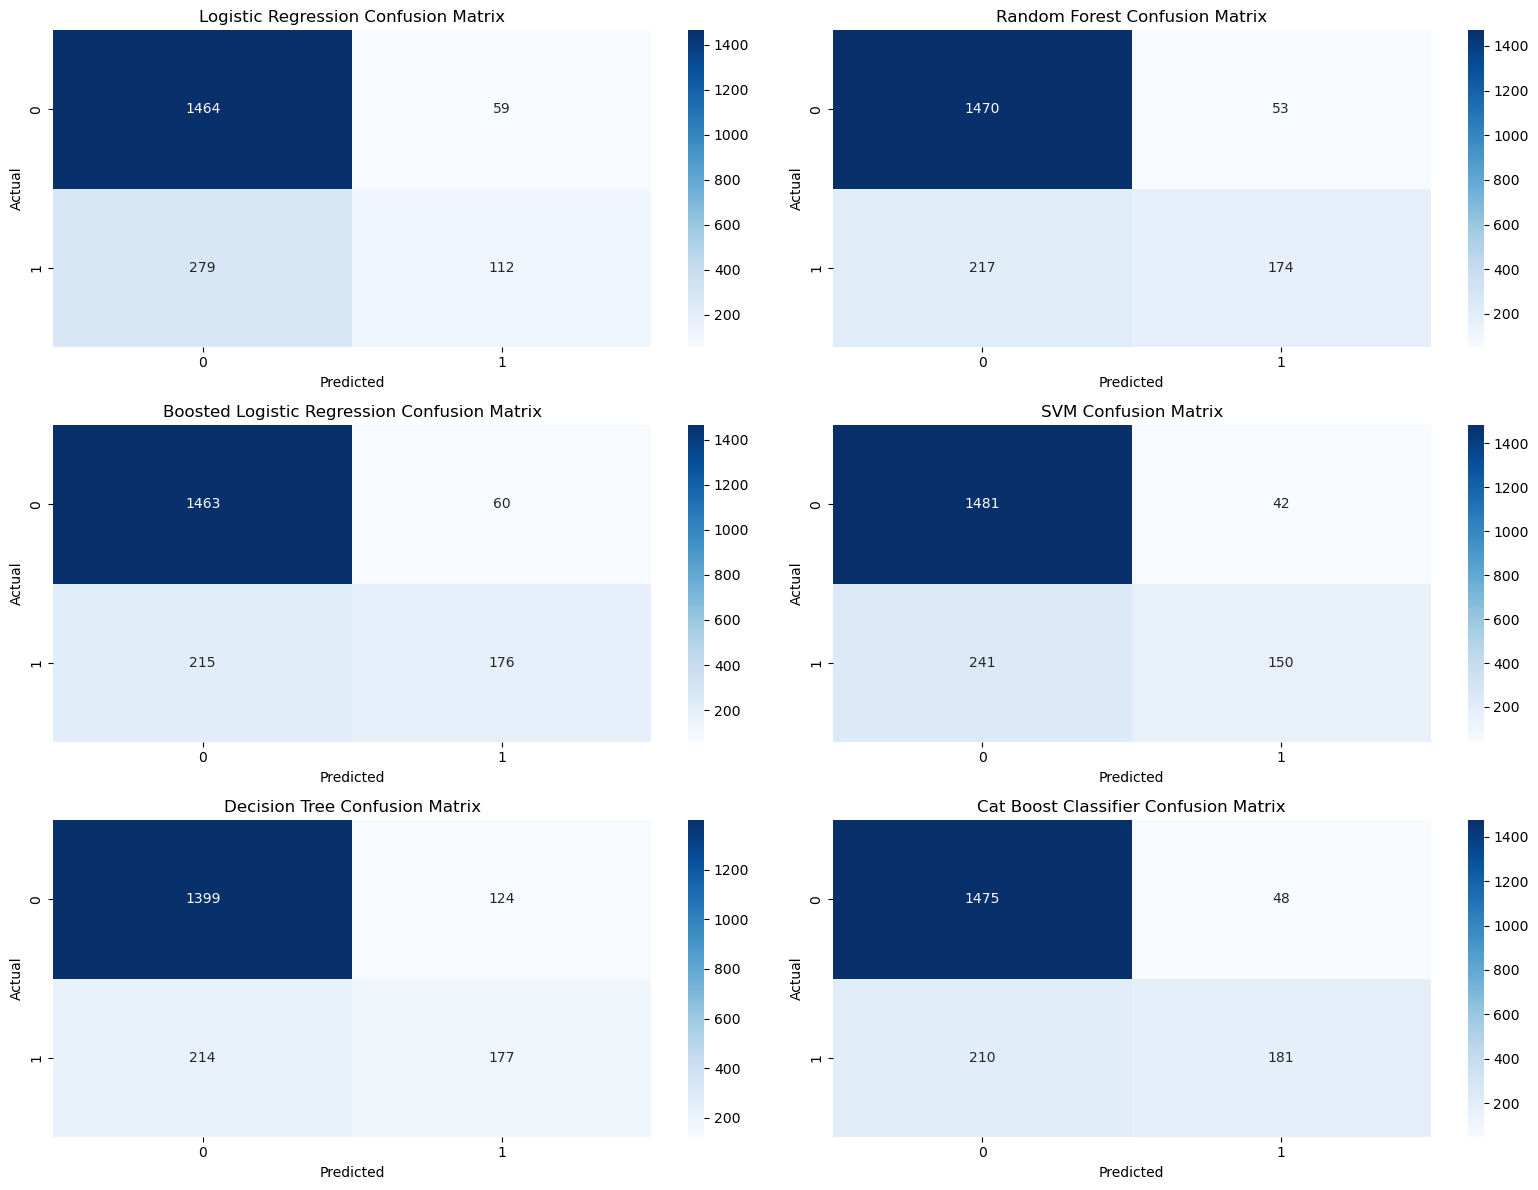

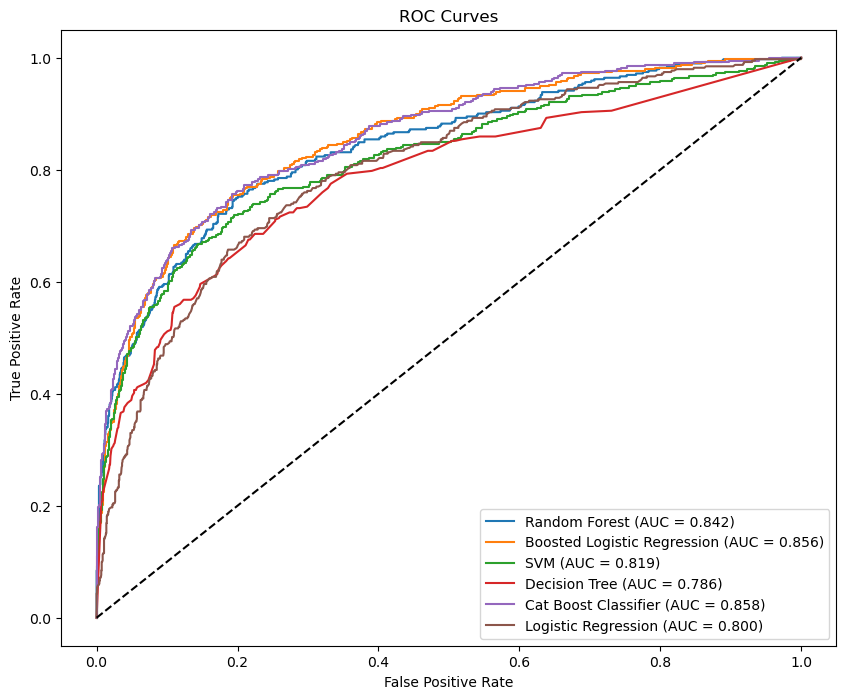

Logostic Regression - Accuracy: 0.8234, AUC: 0.8004
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1523
           1       0.65      0.29      0.40       391

    accuracy                           0.82      1914
   macro avg       0.75      0.62      0.65      1914
weighted avg       0.80      0.82      0.79      1914

Random Forest - Accuracy: 0.8589, AUC: 0.8417
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1523
           1       0.77      0.45      0.56       391

    accuracy                           0.86      1914
   macro avg       0.82      0.71      0.74      1914
weighted avg       0.85      0.86      0.84      1914

Boosted Logistic Regression - Accuracy: 0.8563, AUC: 0.8557
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1523
           1       0.75      0.45      0.56       391

    accuracy            

In [104]:
# Plot Confusion Matrices for all models
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title('Logistic Regression Confusion Matrix')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')


sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0, 1])
ax[0, 1].set_title('Random Forest Confusion Matrix')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

sns.heatmap(cm_boosted_logistic, annot=True, fmt='d', cmap='Blues', ax=ax[1, 0])
ax[1, 0].set_title('Boosted Logistic Regression Confusion Matrix')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax[1, 1])
ax[1, 1].set_title('SVM Confusion Matrix')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[2, 0])
ax[2, 0].set_title('Decision Tree Confusion Matrix')
ax[2, 0].set_xlabel('Predicted')
ax[2, 0].set_ylabel('Actual')

sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', ax=ax[2, 1])
ax[2, 1].set_title('Cat Boost Classifier Confusion Matrix')
ax[2, 1].set_xlabel('Predicted')
ax[2, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves and AUC for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_boosted_logistic, tpr_boosted_logistic, label=f'Boosted Logistic Regression (AUC = {auc_boosted_logistic:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_cat, tpr_cat, label=f'Cat Boost Classifier (AUC = {auc_cat:.3f})')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Print accuracy, recall, and precision for all models
print(f"Logostic Regression - Accuracy: {accuracy_logistic:.4f}, AUC: {auc_logistic:.4f}")
print(report_logistic)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, AUC: {auc_rf:.4f}")
print(report_rf)
print(f"Boosted Logistic Regression - Accuracy: {accuracy_boosted_logistic:.4f}, AUC: {auc_boosted_logistic:.4f}")
print(report_boosted_logistic)
print(f"SVM - Accuracy: {accuracy_svm:.4f}, AUC: {auc_svm:.4f}")
print(report_svm)
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, AUC: {auc_dt:.4f}")
print(report_dt)
print(f"Cat Boost Classifier - Accuracy: {accuracy_cat:.4f}, AUC: {auc_cat:.4f}")
print(report_cat)



## Profit Analysis

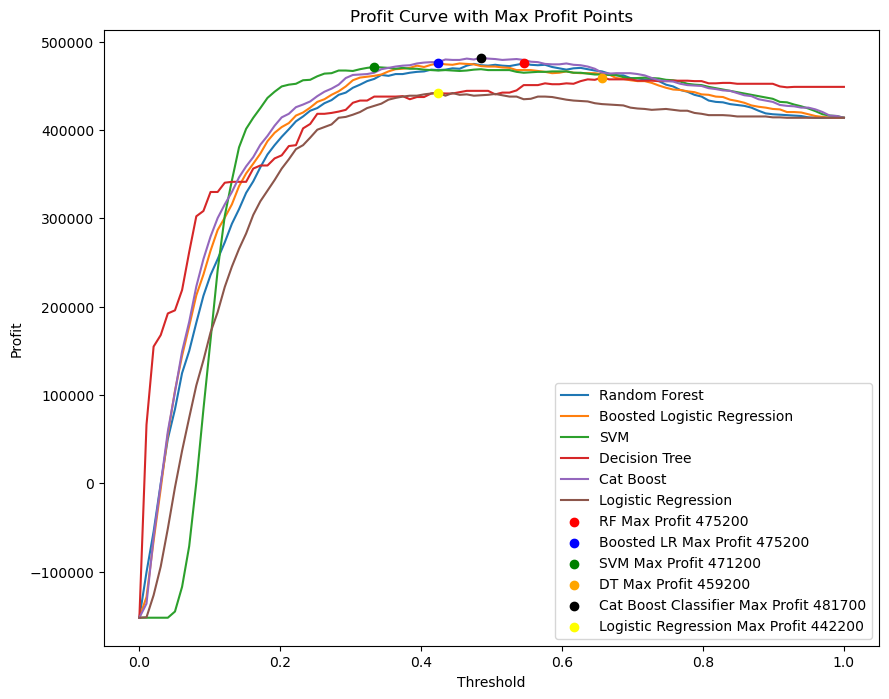

Random Forest: Maximum profit of $475200 at threshold 0.55
Boosted Logistic Regression: Maximum profit of $475200 at threshold 0.42
SVM: Maximum profit of $471200 at threshold 0.33
Decision Tree: Maximum profit of $459200 at threshold 0.66
Cat Boost Classifier: Maximum profit of $481700 at threshold 0.48
Logistic Regression: Maximum profit of $442200 at threshold 0.42


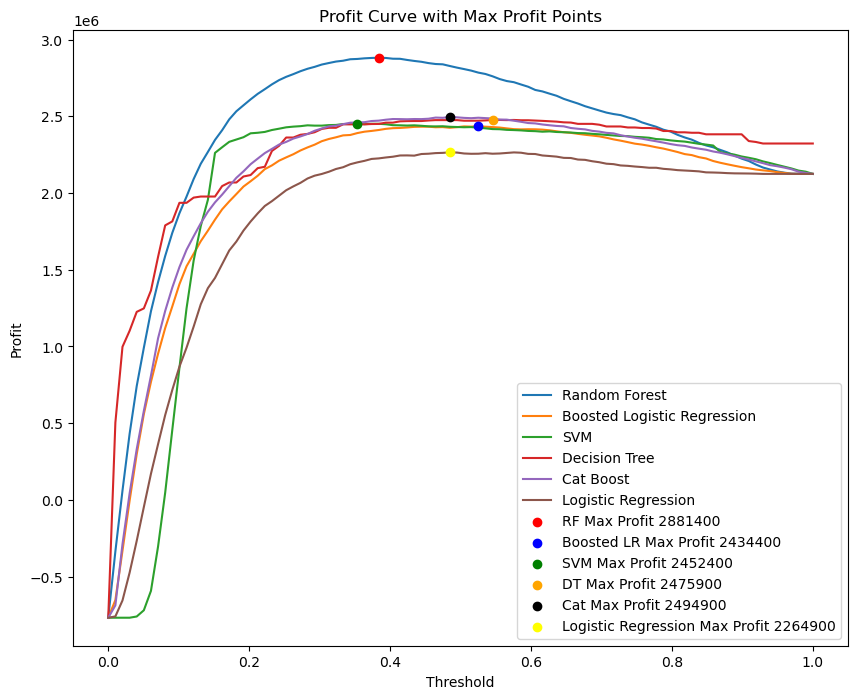

Random Forest: Maximum profit of $2881400 at threshold 0.38
Boosted Logistic Regression: Maximum profit of $2434400 at threshold 0.53
SVM: Maximum profit of $2452400 at threshold 0.35
Decision Tree: Maximum profit of $2475900 at threshold 0.55
Cat Boost Classifier: Maximum profit of $2494900 at threshold 0.48
Logistic Regression: Maximum profit of $2264900 at threshold 0.48


In [105]:
#Culating the profit curve according to the test data to avoid overfitting but knowing that we only calculate 20% of the profit####'#

# Define the cost-benefit matrix
cost_benefit_matrix = np.array([[400, -100],
                                [-500, 0]])

# Function to calculate profit at each threshold
def calculate_profit(y_true, y_pred_probs, cost_benefit_matrix):
    thresholds = np.linspace(0, 1, 100)
    profits = []
    
    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        confusion_mat = confusion_matrix(y_true, y_pred)
        
        # Calculate profit: multiply cost-benefit matrix with the confusion matrix and sum all
        profit = (confusion_mat * cost_benefit_matrix).sum()
        profits.append(profit)
    
    max_profit = max(profits)
    max_profit_threshold = thresholds[np.argmax(profits)]
    
    return thresholds, profits, max_profit, max_profit_threshold


# Calculate profits for each model and find max profit and corresponding threshold
thresholds_rf, profits_rf, max_profit_rf, max_profit_threshold_rf = calculate_profit(y_test, y_pred_proba_rf, cost_benefit_matrix)
thresholds_boosted, profits_boosted, max_profit_boosted, max_profit_threshold_boosted = calculate_profit(y_test, y_pred_proba_boosted_logistic, cost_benefit_matrix)
thresholds_svm, profits_svm, max_profit_svm, max_profit_threshold_svm = calculate_profit(y_test, y_pred_proba_svm, cost_benefit_matrix)
thresholds_dt, profits_dt, max_profit_dt, max_profit_threshold_dt = calculate_profit(y_test, y_pred_proba_dt, cost_benefit_matrix)
thresholds_cat, profits_cat, max_profit_cat, max_profit_threshold_cat = calculate_profit(y_test, y_pred_proba_cat, cost_benefit_matrix)
thresholds_logistic, profits_logistic, max_profit_logistic, max_profit_threshold_logistic = calculate_profit(y_test, y_pred_proba_logistic, cost_benefit_matrix)

# Plot the profit curve for all models
plt.figure(figsize=(10, 8))
plt.plot(thresholds_rf, profits_rf, label='Random Forest')
plt.plot(thresholds_boosted, profits_boosted, label='Boosted Logistic Regression')
plt.plot(thresholds_svm, profits_svm, label='SVM')
plt.plot(thresholds_dt, profits_dt, label='Decision Tree')
plt.plot(thresholds_cat, profits_cat, label='Cat Boost')
plt.plot(thresholds_logistic, profits_logistic, label='Logistic Regression')
# Plot the maximum profit point for each model
plt.scatter(max_profit_threshold_rf, max_profit_rf, color='red', zorder=5, label=f'RF Max Profit {max_profit_rf}')
plt.scatter(max_profit_threshold_boosted, max_profit_boosted, color='blue', zorder=5, label=f'Boosted LR Max Profit {max_profit_boosted}')
plt.scatter(max_profit_threshold_svm, max_profit_svm, color='green', zorder=5, label=f'SVM Max Profit {max_profit_svm}')
plt.scatter(max_profit_threshold_dt, max_profit_dt, color='orange', zorder=5, label=f'DT Max Profit {max_profit_dt}')
plt.scatter(max_profit_threshold_cat, max_profit_cat, color='black', zorder=5, label=f'Cat Boost Classifier Max Profit {max_profit_cat}')
plt.scatter(max_profit_threshold_logistic, max_profit_logistic, color='yellow', zorder=5, label=f'Logistic Regression Max Profit {max_profit_logistic}')

plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit Curve with Max Profit Points')
plt.legend(loc='lower right')
plt.show()

# Print out the max profit and corresponding threshold for each model
print(f"Random Forest: Maximum profit of ${max_profit_rf} at threshold {max_profit_threshold_rf:.2f}")
print(f"Boosted Logistic Regression: Maximum profit of ${max_profit_boosted} at threshold {max_profit_threshold_boosted:.2f}")
print(f"SVM: Maximum profit of ${max_profit_svm} at threshold {max_profit_threshold_svm:.2f}")
print(f"Decision Tree: Maximum profit of ${max_profit_dt} at threshold {max_profit_threshold_dt:.2f}")
print(f"Cat Boost Classifier: Maximum profit of ${max_profit_cat} at threshold {max_profit_threshold_cat:.2f}")
print(f"Logistic Regression: Maximum profit of ${max_profit_logistic} at threshold {max_profit_threshold_logistic:.2f}")
#claculating the profit of applying this model with the whole dataframe knowing that the applied models might be overfitting but knowing it is 100% of the profit

# Define the cost-benefit matrix
cost_benefit_matrix = np.array([[400, -100],
                                [-500, 0]])

# Function to calculate profit at each threshold
def calculate_profit(y_true, y_pred_probs, cost_benefit_matrix):
    thresholds = np.linspace(0, 1, 100)
    profits = []
    
    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        confusion_mat = confusion_matrix(y_true, y_pred)
        
        # Calculate profit: multiply cost-benefit matrix with the confusion matrix and sum all
        profit = (confusion_mat * cost_benefit_matrix).sum()
        profits.append(profit)
    
    max_profit = max(profits)
    max_profit_threshold = thresholds[np.argmax(profits)]
    
    return thresholds, profits, max_profit, max_profit_threshold


# Calculate profits for each model and find max profit and corresponding threshold
thresholds_rf, profits_rf, max_profit_rf, max_profit_threshold_rf = calculate_profit(y, Y_pred_proba_rf, cost_benefit_matrix)
thresholds_boosted, profits_boosted, max_profit_boosted, max_profit_threshold_boosted = calculate_profit(y, Y_pred_proba_boosted_logistic, cost_benefit_matrix)
thresholds_svm, profits_svm, max_profit_svm, max_profit_threshold_svm = calculate_profit(y, Y_pred_proba_svm, cost_benefit_matrix)
thresholds_dt, profits_dt, max_profit_dt, max_profit_threshold_dt = calculate_profit(y, Y_pred_proba_dt, cost_benefit_matrix)
thresholds_cat, profits_cat, max_profit_cat, max_profit_threshold_cat = calculate_profit(y, Y_pred_proba_cat, cost_benefit_matrix)
thresholds_logistic, profits_logistic, max_profit_logistic, max_profit_threshold_logistic = calculate_profit(y, Y_pred_proba_logistic, cost_benefit_matrix)

# Plot the profit curve for all models
plt.figure(figsize=(10, 8))
plt.plot(thresholds_rf, profits_rf, label='Random Forest')
plt.plot(thresholds_boosted, profits_boosted, label='Boosted Logistic Regression')
plt.plot(thresholds_svm, profits_svm, label='SVM')
plt.plot(thresholds_dt, profits_dt, label='Decision Tree')
plt.plot(thresholds_cat, profits_cat, label='Cat Boost')
plt.plot(thresholds_logistic, profits_logistic, label='Logistic Regression')

# Plot the maximum profit point for each model
plt.scatter(max_profit_threshold_rf, max_profit_rf, color='red', zorder=5, label=f'RF Max Profit {max_profit_rf}')
plt.scatter(max_profit_threshold_boosted, max_profit_boosted, color='blue', zorder=5, label=f'Boosted LR Max Profit {max_profit_boosted}')
plt.scatter(max_profit_threshold_svm, max_profit_svm, color='green', zorder=5, label=f'SVM Max Profit {max_profit_svm}')
plt.scatter(max_profit_threshold_dt, max_profit_dt, color='orange', zorder=5, label=f'DT Max Profit {max_profit_dt}')
plt.scatter(max_profit_threshold_cat, max_profit_cat, color='black', zorder=5, label=f'Cat Max Profit {max_profit_cat}')
plt.scatter(max_profit_threshold_logistic, max_profit_logistic, color='yellow', zorder=5, label=f'Logistic Regression Max Profit {max_profit_logistic}')

plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit Curve with Max Profit Points')
plt.legend(loc='lower right')
plt.show()

# Print out the max profit and corresponding threshold for each model
print(f"Random Forest: Maximum profit of ${max_profit_rf} at threshold {max_profit_threshold_rf:.2f}")
print(f"Boosted Logistic Regression: Maximum profit of ${max_profit_boosted} at threshold {max_profit_threshold_boosted:.2f}")
print(f"SVM: Maximum profit of ${max_profit_svm} at threshold {max_profit_threshold_svm:.2f}")
print(f"Decision Tree: Maximum profit of ${max_profit_dt} at threshold {max_profit_threshold_dt:.2f}")
print(f"Cat Boost Classifier: Maximum profit of ${max_profit_cat} at threshold {max_profit_threshold_cat:.2f}")
print(f"Logistic Regression: Maximum profit of ${max_profit_logistic} at threshold {max_profit_threshold_logistic:.2f}")


-------------------------------------